**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# import data 2C_weka.csv for 2 Class Classifcation.


In [3]:
ClassData2 = pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [5]:
#EDA

In [27]:
ClassData2.shape

(310, 7)

In [3]:
ClassData2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [8]:
ClassData2.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
#missing values 
ClassData2.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
#Unique values of class values
np.unique(ClassData2['class'])

array(['Abnormal', 'Normal'], dtype=object)

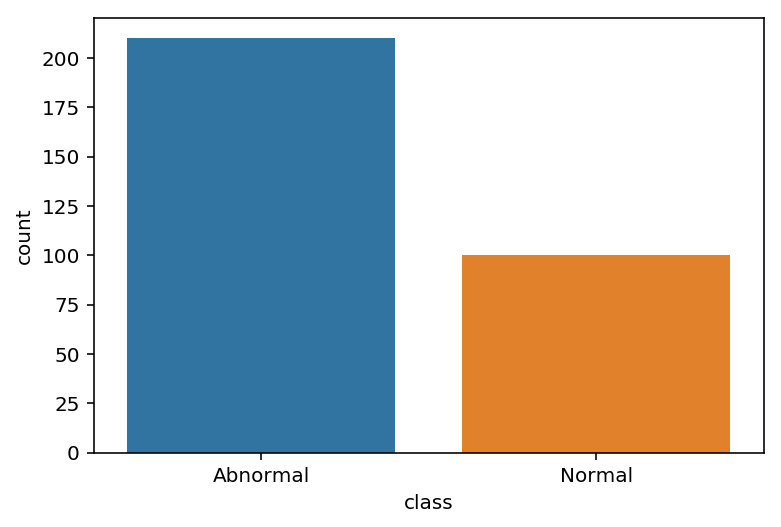

In [9]:
#Distribution of class values and other attributes

#Distribution of "class" values
sns.countplot(x='class', data=ClassData2)

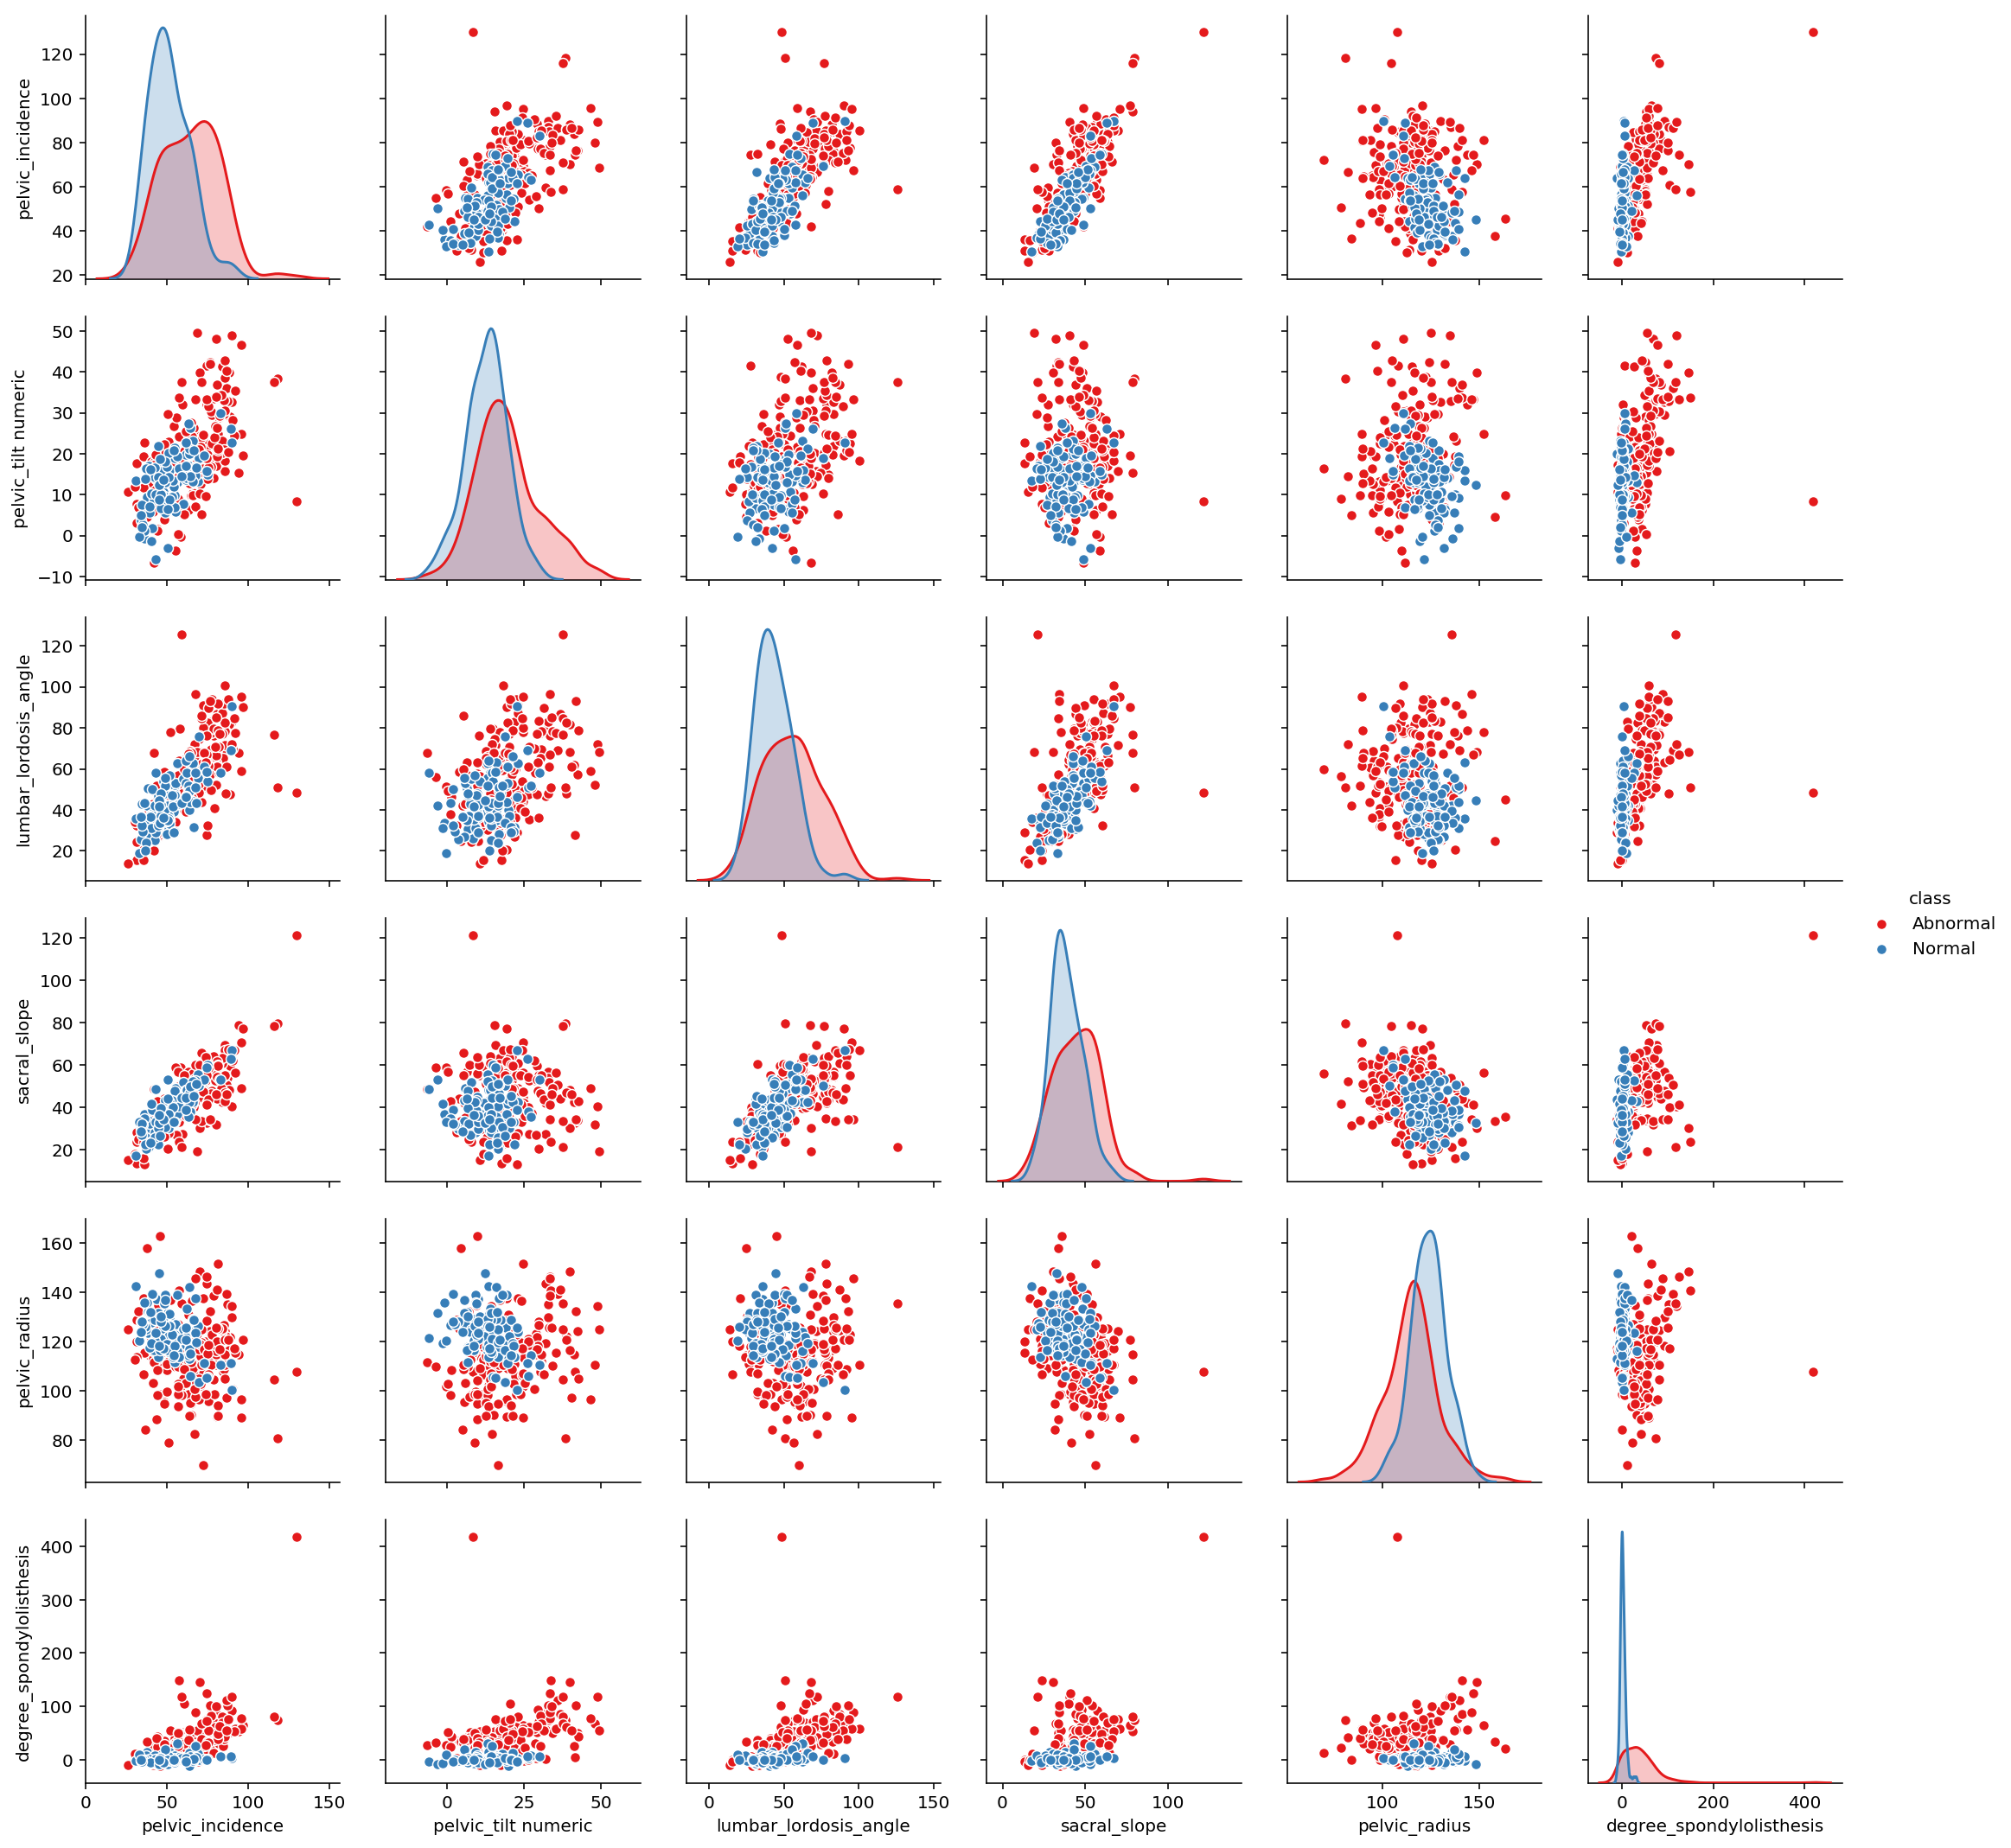

In [12]:
#other attributes
sns.pairplot(ClassData2, hue='class', palette='Set1')

In [7]:
#DataType Info

ClassData2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

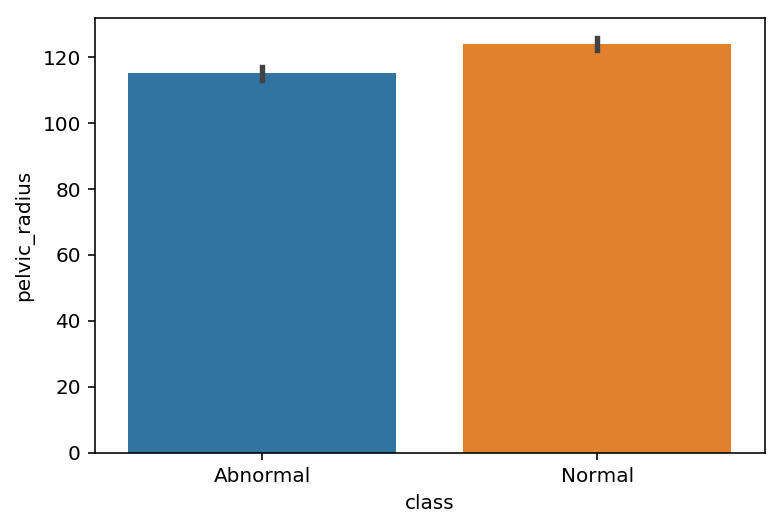

In [7]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.
sns.barplot(x='class', y ='pelvic_radius', data=ClassData2)

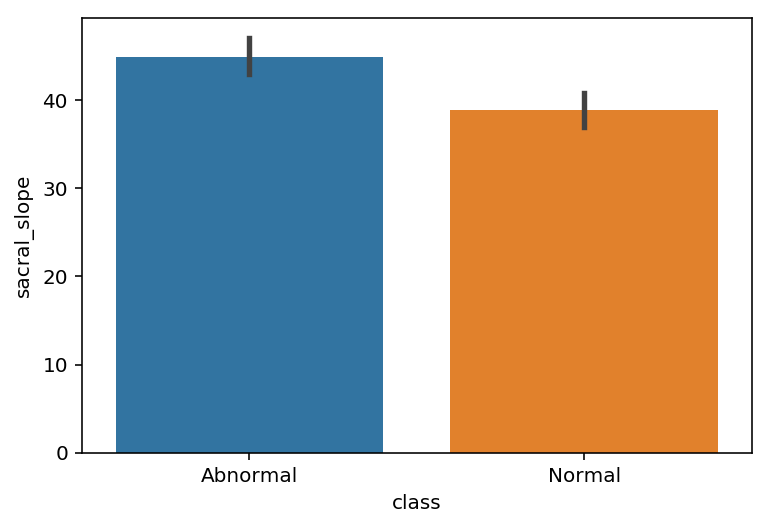

In [8]:
sns.barplot(x='class', y ='sacral_slope', data=ClassData2)

# Encode the Class variable to integer.

In [4]:
num = LabelEncoder()
ClassData2['class'] = num.fit_transform(ClassData2['class'].astype("str"))
ClassData2.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
166,56.991404,6.874089,57.009005,50.117315,109.978045,36.810111,0
216,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,1
220,44.489275,21.786433,31.474154,22.702842,113.778494,-0.284129,1
81,74.005541,21.122402,57.379502,52.883139,120.205963,74.555166,0
153,57.286945,15.149350,64.000000,42.137595,116.735387,30.341203,0
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,1
85,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315,0
274,43.191915,9.976664,28.938149,33.215251,123.467400,1.741018,1
12,48.915551,19.964556,40.263794,28.950995,119.321358,8.028895,0
237,62.140805,13.960975,58.000000,48.179830,133.281834,4.955106,1


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [58]:
#Feature Set
X = ClassData2.drop(columns='class')

In [59]:
X.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [60]:
#Target Set
Y = ClassData2['class']

In [61]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

As per confirmation, First splitting the data and then Normalization.

# Split the dat as train and test with a ratio of 70:30.

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=0)

In [63]:
X_train.shape

(217, 6)

In [65]:
X_test.shape

(93, 6)

In [66]:
Y_train.shape

(217,)

In [68]:
Y_test.shape

(93,)

# Normalize your Data (X) to get values between 0 to 1.

In [10]:
#Using MinMaxScaler
minmax=MinMaxScaler()

In [11]:
minmax.fit(X_train)
scaledX_train = minmax.transform(X_train)
scaledX_test = minmax.transform(X_test)

In [69]:
scaledX_train

array([[0.5298144 , 0.50146935, 0.57960778, 0.42914119, 0.21496543,
        0.14017092],
       [0.31845816, 0.38078308, 0.26130781, 0.28808666, 0.54795041,
        0.03232924],
       [0.14489653, 0.43052212, 0.17423472, 0.09576146, 0.49786083,
        0.00346584],
       ...,
       [0.20887692, 0.31092826, 0.35796623, 0.21869741, 0.5947895 ,
        0.02480359],
       [0.36410574, 0.36533832, 0.43067215, 0.33988363, 0.47367883,
        0.12216213],
       [0.30818024, 0.38573976, 0.58751062, 0.27566399, 0.46785459,
        0.14268128]])

In [70]:
scaledX_test

array([[ 0.66867492,  0.95756115,  0.402712  ,  0.32816814,  0.28607127,
         0.20563545],
       [ 0.53010648,  0.49127442,  0.41780928,  0.4346612 ,  0.25741051,
         0.12003959],
       [ 0.33053615,  0.21314302,  0.40999873,  0.38584507,  0.41887453,
         0.09619144],
       [ 0.59676819,  0.83665322,  0.60652431,  0.32121489,  0.50026595,
         0.15787724],
       [ 0.17015073,  0.36222878,  0.25675856,  0.15512375,  0.5906143 ,
         0.05667394],
       [ 0.41333393,  0.35786583,  0.37201768,  0.39102384,  0.60791461,
         0.05095467],
       [ 0.21958224,  0.4781856 ,  0.23503878,  0.14302658,  0.52951495,
         0.04442974],
       [ 0.61274013,  0.70790432,  0.61866168,  0.4027278 ,  0.6438745 ,
         0.23995613],
       [ 0.16813285,  0.41587475,  0.29532214,  0.12561519,  0.42144   ,
         0.0466735 ],
       [ 0.29306845,  0.37743717,  0.27734817,  0.26541098,  0.34026542,
         0.08573381],
       [ 0.68002732,  0.46911622,  0.68202856,  0.

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [32]:
#  knn.Predict and accuracy score 

neighbors = np.arange(1,50,2)
training_accuracy_plot = np.empty(len(neighbors))
testing_accuracy_plot = np.empty(len(neighbors))

#Loop over different values of k -Iterative Loop

for k in neighbors :
    report_train = []
    report_test = []
    
    for j in range(20):       
        X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=j) #(First Split at 70:30)
        #Scale the data using MinMaxScaler
        minmax=MinMaxScaler()                                              
        minmax.fit(X_train)
        scaledX_train = minmax.transform(X_train)
        scaledX_test = minmax.transform(X_test)
        #Build the model using KNN
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(scaledX_train,Y_train)
        train_pred = knn.predict(scaledX_train)
        report_train.append(accuracy_score(Y_train,train_pred))
        test_pred = knn.predict(scaledX_test)
        report_test.append(accuracy_score(Y_test,test_pred))


print("Training Prediction")
print(train_pred,'\n')
print("Testing Prediction")
print(test_pred,'\n')
print(report_train,'\n')
print(report_test)


Training Prediction
[0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0] 

Testing Prediction
[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1
 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0] 

[0.8294930875576036, 0.8433179723502304, 0.815668202764977, 0.8202764976958525, 0.7972350230414746, 0.815668202764977, 0.8202764976958525, 0.8248847926267281, 0.8018433179723502, 0.8018433179723502, 0.8110599078341014, 0.8341013824884793, 0.8433179723502304, 0.7926267281105991, 0.847926267281106, 0.8064516129032258, 0.857142

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

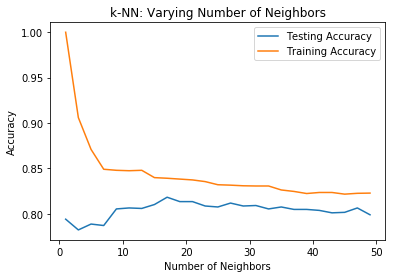

In [29]:
# knn.score and different values of random state

neighbors = np.arange(1,50,2)
training_accuracy_plot = np.empty(len(neighbors))
testing_accuracy_plot = np.empty(len(neighbors))

#Loop over different values of k -Iterative Loop

for i,k in enumerate(neighbors) :
    report_train = []
    report_test = []
    
    for j in range(20):       
        X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=j) #(First Split at 70:30)
        #Scale the data using MinMaxScaler
        minmax=MinMaxScaler()                                              
        minmax.fit(X_train)
        scaledX_train = minmax.transform(X_train)
        scaledX_test = minmax.transform(X_test)
        #Build the model using KNN
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(scaledX_train,Y_train)
        report_train.append(knn.score(scaledX_train,Y_train))
        report_test.append(knn.score(scaledX_test,Y_test))

    #Compute accuracy of training dataset
    training_accuracy_plot[i] = np.mean(report_train)
    #Compute accuracy of testing dataset
    testing_accuracy_plot[i] = np.mean(report_test)

#Plot the Accuracy graph
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, testing_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, training_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [33]:
k= np.arange(1,50,2)
low_test_error = 100
k_best = 0
report_train = []
report_test = []

for i in k :
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(scaledX_train,Y_train)
    report_train.append(knn.score(scaledX_train,Y_train))
    report_test.append(knn.score(scaledX_test,Y_test))
    if(1-knn.score(scaledX_test,Y_test)) < low_test_error:
        low_test_error = 1-knn.score(scaledX_test,Y_test)
        k_best = i

print("best model with  {}  nearest neighbors".format(k_best))

best model with  15  nearest neighbors


Text(0, 0.5, 'Mean Error')

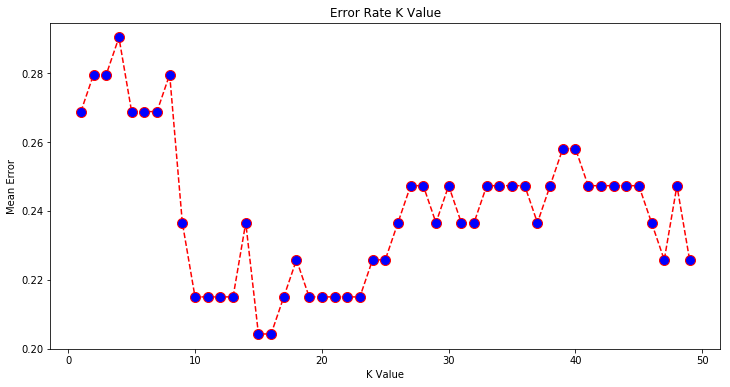

In [37]:
error = []

# Calculating error for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaledX_train, Y_train)
    pred_i = knn.predict(scaledX_test)
    error.append(np.mean(pred_i != Y_test))
    

plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [39]:
Classdata3 = pd.read_csv("3Classdata.csv")

In [18]:
#EDA

In [8]:
Classdata3.shape

(310, 7)

In [9]:
Classdata3.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [10]:
Classdata3.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [11]:
#Missing Values
Classdata3.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [40]:
#Unique Value
np.unique(Classdata3['class'])

array(['Hernia', 'Normal', 'Spondylolisthesis'], dtype=object)

In [13]:
#DataType
Classdata3.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

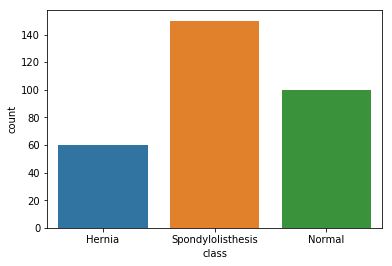

In [14]:
#Distribution of class values and other attributes

#Distribution of Class values
sns.countplot(x='class', data=Classdata3)


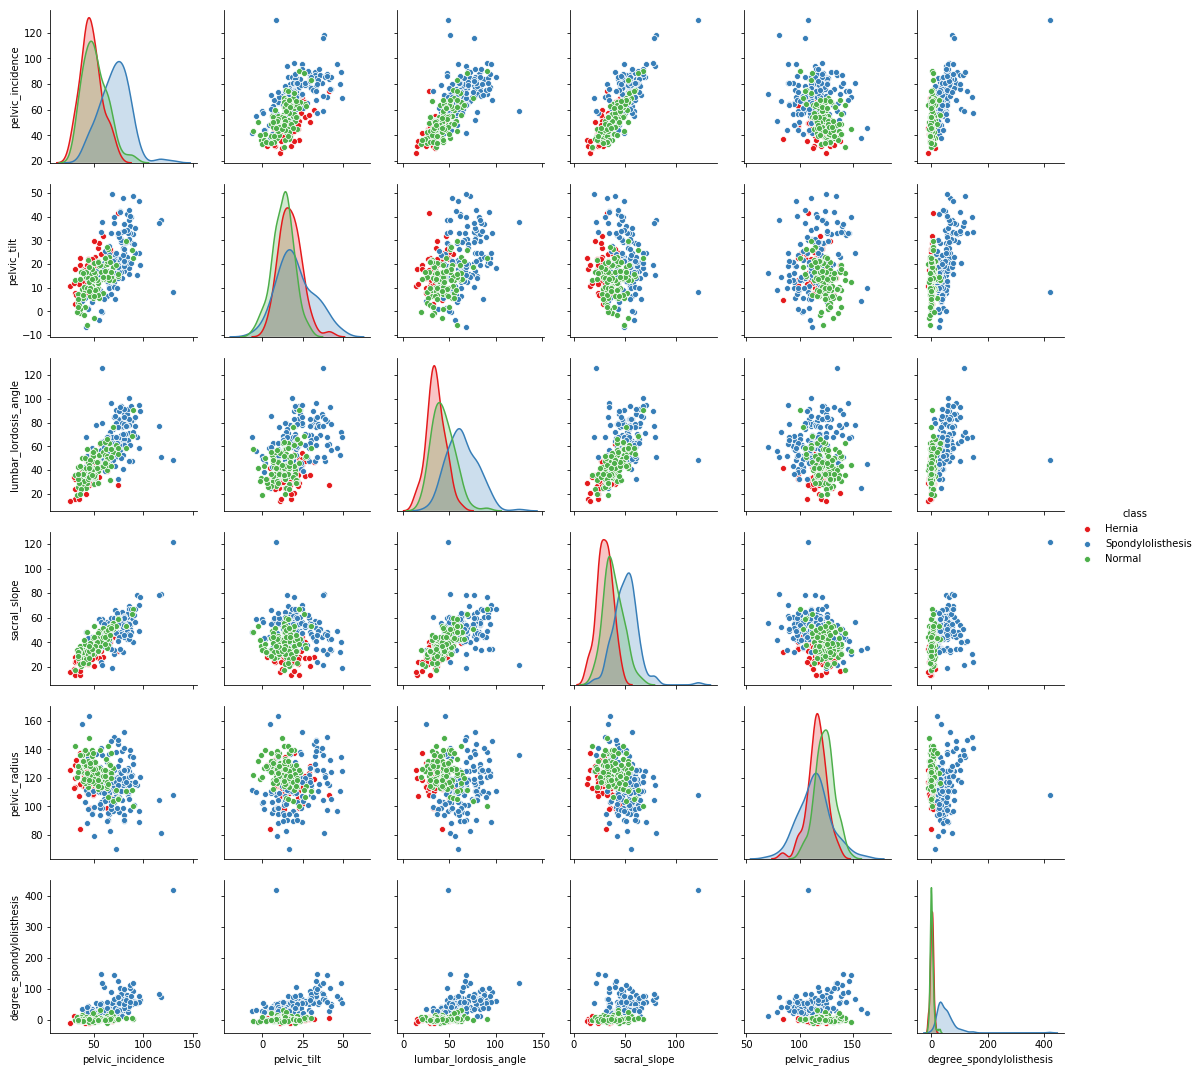

In [15]:
#Distribution of other attributes
sns.pairplot(Classdata3, hue='class', palette='Set1')

In [16]:
#DataType Info
ClassData2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int32
dtype: object

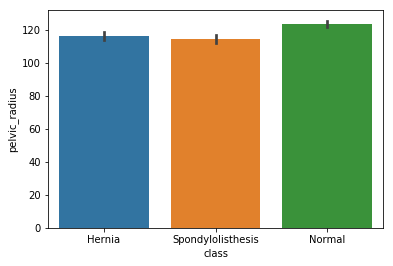

In [17]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.
sns.barplot(x='class', y ='pelvic_radius', data=Classdata3)


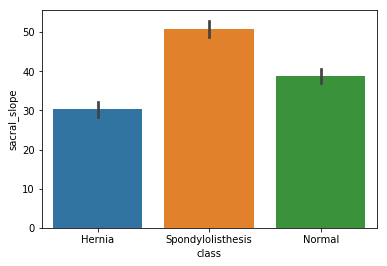

In [18]:
sns.barplot(x='class', y ='sacral_slope', data=Classdata3)

# Encode the class variable to integer

In [41]:
num = LabelEncoder()
ClassData2['class'] = num.fit_transform(Classdata3['class'].astype("str"))
ClassData2.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
164,53.941658,9.306594,43.100498,44.635064,124.397821,25.082127,2
186,81.082320,21.255840,78.766756,59.826480,90.071880,49.159426,2
218,51.624672,15.969344,35.000000,35.655328,129.385308,1.009228,1
220,44.489275,21.786433,31.474154,22.702842,113.778494,-0.284129,1
204,56.535051,14.377189,44.991547,42.157862,101.723334,25.773174,2
27,43.580964,16.508884,47.000000,27.072080,109.271634,8.992816,0
75,70.221452,39.822724,68.118403,30.398728,148.525562,145.378143,2
275,67.289712,16.717514,51.000000,50.572198,137.591778,4.960344,1
178,80.654320,26.344379,60.898118,54.309940,120.103493,52.467552,2
67,75.649731,19.339799,64.148685,56.309932,95.903629,69.551303,2


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [42]:
#Feature Set
X = Classdata3.drop(columns='class')

In [43]:
X.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [44]:
#Target Set
Y = ClassData2['class']

In [45]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

# Split the dat as train and test with a ratio of 70:30.

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=0)

In [46]:
X_train.shape

(217, 6)

In [47]:
X_test.shape

(93, 6)

In [48]:
Y_train.shape

(217,)

In [49]:
Y_test.shape

(93,)

# Normalize your Data (X) to get values between 0 to 1.

In [50]:
#Using MinMax Scaler
minmax=MinMaxScaler()

In [51]:
minmax.fit(X_train)
scaledX_train = minmax.transform(X_train)
scaledX_test = minmax.transform(X_test)

In [52]:
scaledX_train

array([[0.5298144 , 0.50146935, 0.57960778, 0.42914119, 0.21496543,
        0.14017092],
       [0.31845816, 0.38078308, 0.26130781, 0.28808666, 0.54795041,
        0.03232924],
       [0.14489653, 0.43052212, 0.17423472, 0.09576146, 0.49786083,
        0.00346584],
       ...,
       [0.20887692, 0.31092826, 0.35796623, 0.21869741, 0.5947895 ,
        0.02480359],
       [0.36410574, 0.36533832, 0.43067215, 0.33988363, 0.47367883,
        0.12216213],
       [0.30818024, 0.38573976, 0.58751062, 0.27566399, 0.46785459,
        0.14268128]])

In [53]:
scaledX_test

array([[ 0.66867492,  0.95756115,  0.402712  ,  0.32816814,  0.28607127,
         0.20563545],
       [ 0.53010648,  0.49127442,  0.41780928,  0.4346612 ,  0.25741051,
         0.12003959],
       [ 0.33053615,  0.21314302,  0.40999873,  0.38584507,  0.41887453,
         0.09619144],
       [ 0.59676819,  0.83665322,  0.60652431,  0.32121489,  0.50026595,
         0.15787724],
       [ 0.17015073,  0.36222878,  0.25675856,  0.15512375,  0.5906143 ,
         0.05667394],
       [ 0.41333393,  0.35786583,  0.37201768,  0.39102384,  0.60791461,
         0.05095467],
       [ 0.21958224,  0.4781856 ,  0.23503878,  0.14302658,  0.52951495,
         0.04442974],
       [ 0.61274013,  0.70790432,  0.61866168,  0.4027278 ,  0.6438745 ,
         0.23995613],
       [ 0.16813285,  0.41587475,  0.29532214,  0.12561519,  0.42144   ,
         0.0466735 ],
       [ 0.29306845,  0.37743717,  0.27734817,  0.26541098,  0.34026542,
         0.08573381],
       [ 0.68002732,  0.46911622,  0.68202856,  0.

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [54]:
#  knn.Predict and accuracy score 

neighbors = np.arange(1,50,2)
training_accuracy_plot = np.empty(len(neighbors))
testing_accuracy_plot = np.empty(len(neighbors))

#Loop over different values of k -Iterative Loop

for k in neighbors :
    report_train = []
    report_test = []
    
    for j in range(20):       
        X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=j) #(First Split at 70:30)
        #Scale the data using MinMaxScaler
        minmax=MinMaxScaler()                                              
        minmax.fit(X_train)
        scaledX_train = minmax.transform(X_train)
        scaledX_test = minmax.transform(X_test)
        #Build the model using KNN
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(scaledX_train,Y_train)
        train_pred = knn.predict(scaledX_train)
        report_train.append(accuracy_score(Y_train,train_pred))
        test_pred = knn.predict(scaledX_test)
        report_test.append(accuracy_score(Y_test,test_pred))


print("Training Prediction")
print(train_pred,'\n')
print("Testing Prediction")
print(test_pred,'\n')
print(report_train,'\n')
print(report_test)


Training Prediction
[2 1 0 2 1 0 2 1 2 2 1 2 2 1 2 0 2 1 2 1 1 1 1 2 2 2 0 0 1 1 1 2 1 0 1 2 0
 2 2 1 1 1 2 2 2 2 2 1 1 2 2 1 1 2 1 2 1 1 1 1 2 0 1 2 2 2 2 1 1 1 2 2 2 2
 1 1 2 2 2 1 1 2 1 1 1 2 0 0 2 0 0 2 2 1 2 1 1 2 2 0 2 1 1 2 2 2 1 1 2 2 2
 1 0 1 1 1 1 1 2 2 0 2 1 2 2 1 2 1 1 2 2 2 0 2 1 1 2 1 2 1 1 1 2 2 0 2 0 2
 0 1 1 2 2 1 1 1 2 2 2 0 2 2 0 1 0 1 1 2 2 2 2 1 2 1 2 1 2 1 2 2 0 1 2 2 2
 1 1 2 1 1 2 1 1 1 0 2 2 0 0 2 1 2 2 1 1 1 1 2 1 2 2 2 2 1 1 2 2] 

Testing Prediction
[2 2 2 2 1 2 1 2 0 2 2 2 0 2 1 1 0 1 1 2 2 2 2 2 0 1 1 2 2 1 1 1 2 2 2 2 2
 1 1 2 1 2 0 1 2 2 1 2 2 1 1 2 2 2 1 2 2 1 2 1 2 2 1 2 2 1 2 1 1 1 2 1 2 1
 2 2 2 1 2 1 2 2 1 2 1 2 1 1 1 2 2 2 0] 

[0.7788018433179723, 0.815668202764977, 0.7695852534562212, 0.7926267281105991, 0.7741935483870968, 0.7741935483870968, 0.7788018433179723, 0.815668202764977, 0.7419354838709677, 0.7788018433179723, 0.7741935483870968, 0.7880184331797235, 0.783410138248848, 0.7788018433179723, 0.8018433179723502, 0.7557603686635944, 0.824884

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function

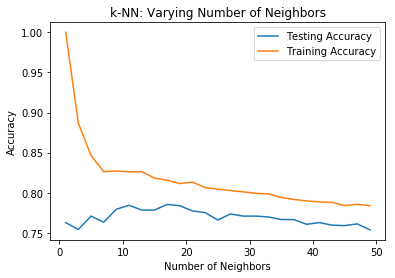

In [55]:
# knn.score and different values of random state

neighbors = np.arange(1,50,2)
training_accuracy_plot = np.empty(len(neighbors))
testing_accuracy_plot = np.empty(len(neighbors))

#Loop over different values of k -Iterative Loop

for i,k in enumerate(neighbors) :
    report_train = []
    report_test = []
    
    for j in range(20):       
        X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=j) #(First Split at 70:30)
        #Scale the data using MinMaxScaler
        minmax=MinMaxScaler()                                              
        minmax.fit(X_train)
        scaledX_train = minmax.transform(X_train)
        scaledX_test = minmax.transform(X_test)
        #Build the model using KNN
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(scaledX_train,Y_train)
        report_train.append(knn.score(scaledX_train,Y_train))
        report_test.append(knn.score(scaledX_test,Y_test))

    #Compute accuracy of training dataset
    training_accuracy_plot[i] = np.mean(report_train)
    #Compute accuracy of testing dataset
    testing_accuracy_plot[i] = np.mean(report_test)

#Plot the Accuracy graph
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, testing_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, training_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [56]:
k= np.arange(1,50,2)
low_test_error = 100
k_best = 0
report_train = []
report_test = []

for i in k :
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(scaledX_train,Y_train)
    report_train.append(knn.score(scaledX_train,Y_train))
    report_test.append(knn.score(scaledX_test,Y_test))
    if(1-knn.score(scaledX_test,Y_test)) < low_test_error:
        low_test_error = 1-knn.score(scaledX_test,Y_test)
        k_best = i

print("best model with  {}  nearest neighbors".format(k_best))

best model with  15  nearest neighbors


Text(0, 0.5, 'Mean Error')

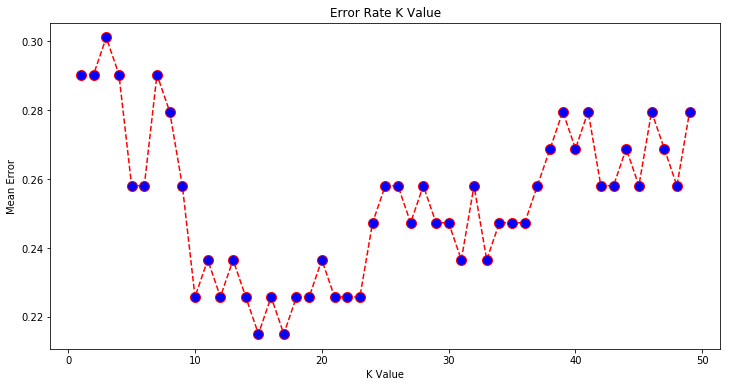

In [57]:
error = []

# Calculating error for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaledX_train, Y_train)
    pred_i = knn.predict(scaledX_test)
    error.append(np.mean(pred_i != Y_test))
    

plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
#Conclusion - for K =15 , we get minimum error, We can say that best value for K=15